In [1]:
import implementations as imp
from implementations import ImagePacker
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
import copy
%matplotlib inline

In [2]:
cats_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/cat",'gray')
dogs_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/dog",'gray')

In [3]:
cats_test_images = copy.deepcopy(cats_train_images)
dogs_test_images = copy.deepcopy(dogs_train_images)

In [4]:
train_packed = ImagePacker(data = [cats_train_images, dogs_train_images])
test_packed = ImagePacker(data = [cats_test_images, dogs_test_images])
# 

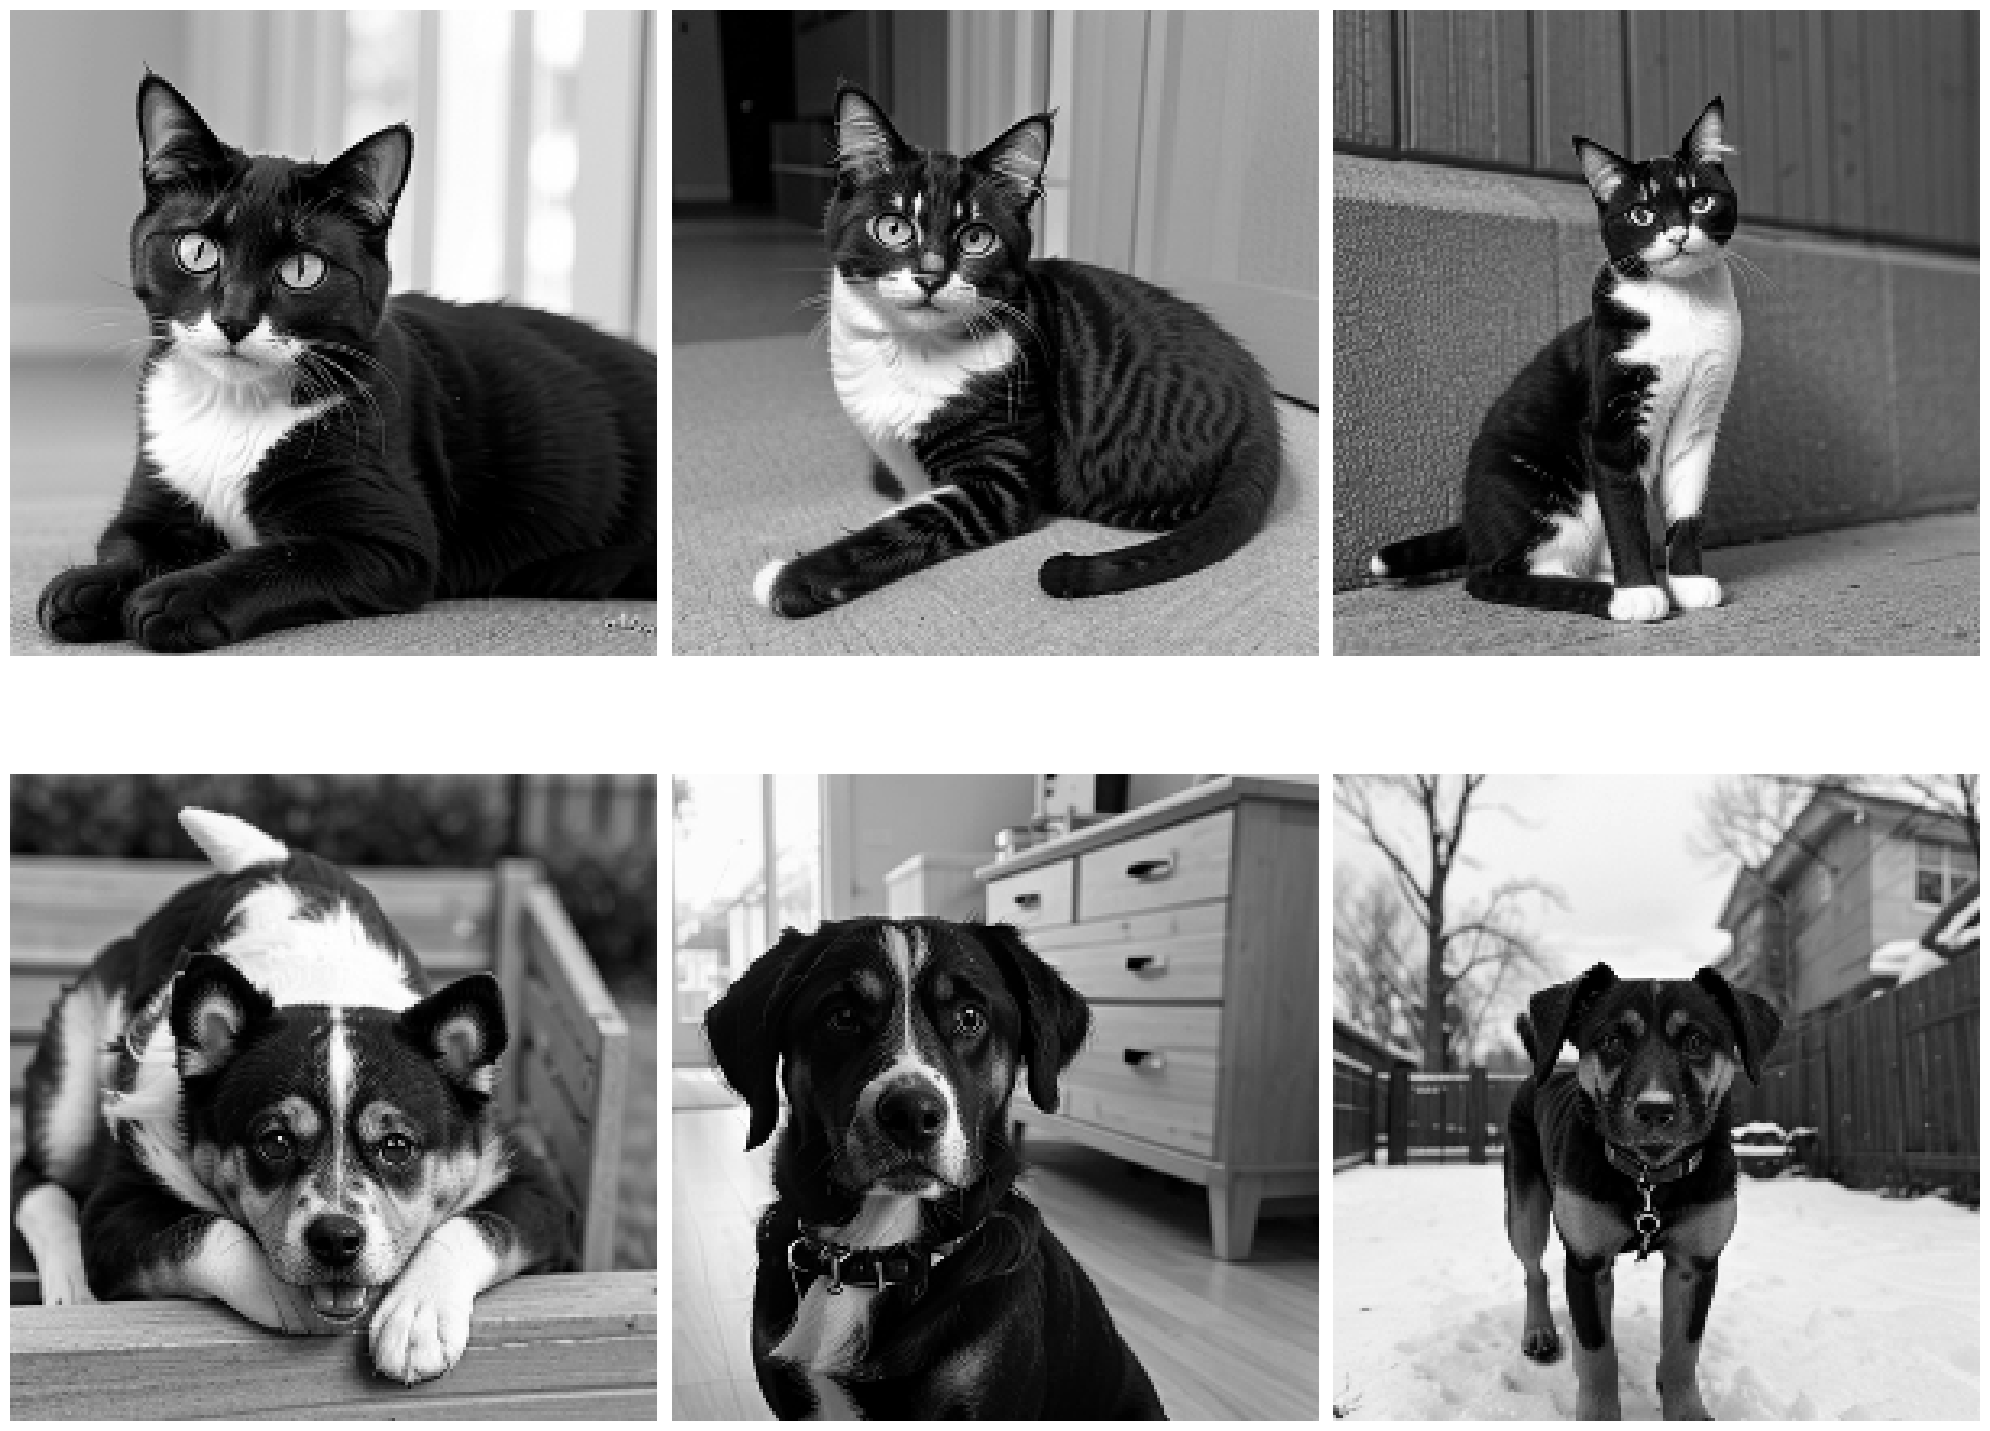

ImagePacker

In [5]:
train_packed

In [6]:
test_packed.rotate_images()

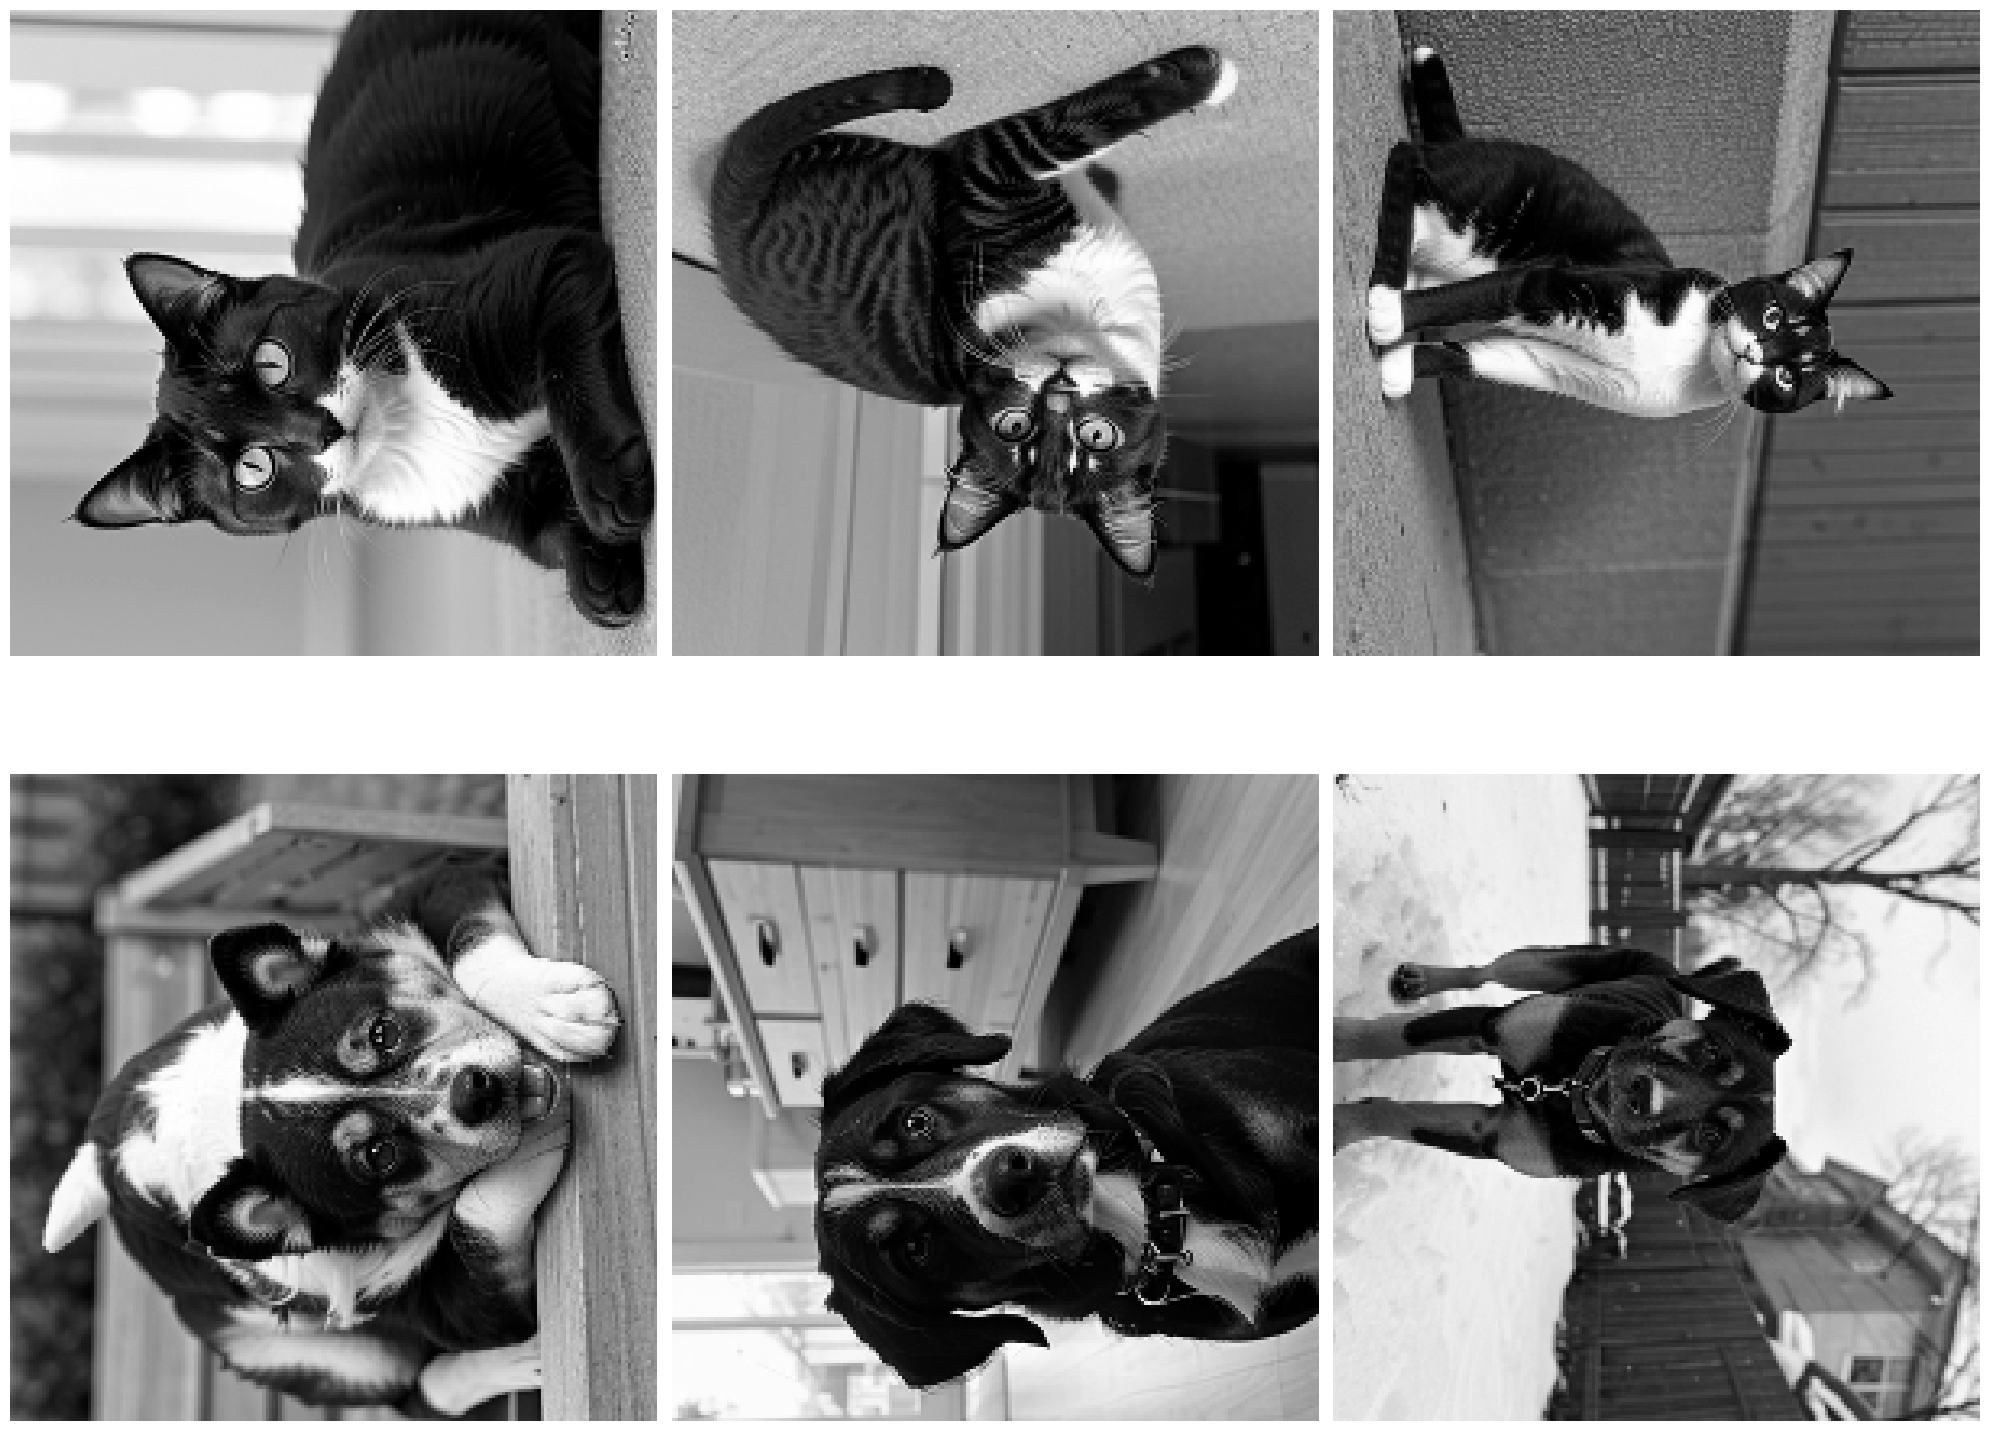

ImagePacker

In [7]:
test_packed

In [8]:
train_sift = train_packed.to_sift(append_label=[1,-1], block_size=8)
test_sift = test_packed.to_sift(append_label=[1,-1], block_size=8)

In [9]:
train_df = train_packed.descriptor_to_df(train_sift)
test_df = test_packed.descriptor_to_df(test_sift)

In [10]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
162,0.874536,0.215804,0.136487,0.000000,0.193021,0.215804,0.272973,0.107902,0.000000,0.912511,...,0.576724,0.051528,0.146544,0.078791,0.036744,0.099124,0.238886,0.343093,0.782161,-1
181,0.169811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181359,0.968645,0.274589,...,0.557339,0.006523,0.000000,0.003460,0.002579,0.217871,0.338711,0.183097,0.405259,-1
142,0.632455,0.235702,0.000000,0.000000,0.737865,0.000000,0.000000,0.000000,0.000000,0.888857,...,0.362929,0.413166,0.000000,0.421998,0.145172,0.183629,0.508101,0.000000,0.725423,-1
51,0.392232,0.000000,0.554700,0.000000,0.196116,0.000000,0.554700,0.438529,0.000000,0.676123,...,0.043173,0.206141,0.375082,0.675769,0.429436,0.369591,0.000000,0.000000,0.189823,1
122,0.242091,0.000000,0.171184,0.000000,0.726273,0.000000,0.171184,0.541332,0.249542,0.627233,...,0.059673,0.188703,0.278812,0.613791,0.179019,0.339665,0.119346,0.000000,0.528286,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.526195,0.309133,0.000000,0.000000,0.424269,0.601948,0.000000,0.291906,0.000000,0.606354,...,0.461226,0.034909,0.000000,0.016456,0.000000,0.000000,0.018399,0.000000,0.255795,-1
19,0.699682,0.000000,0.000000,0.000000,0.485757,0.000000,0.000000,0.310339,0.422107,0.710846,...,0.122537,0.453358,0.273168,0.493202,0.081691,0.390054,0.245074,0.173294,0.284558,1
67,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270464,0.962730,0.240574,...,0.013586,0.000000,0.000000,0.000000,0.000000,0.000000,0.067793,0.994939,0.080034,1
9,0.841910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173915,0.510824,0.518692,...,0.004829,0.006109,0.008905,0.999717,0.011659,0.007787,0.000000,0.000000,0.000000,1


In [11]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
26,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251155,0.226504,0.000000,0.207871,0.000000,0.000000,0.516548,0.666832,0.490189,1
18,0.466569,0.000000,0.000000,0.000000,0.524891,0.000000,0.420560,0.521640,0.240464,0.933897,...,0.173988,0.246439,0.065474,0.272291,0.191892,0.219798,0.195289,0.452535,0.855061,1
194,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.246248,...,0.064078,0.103194,0.148266,0.543636,0.717981,0.242758,0.105697,0.254435,0.038782,-1
75,0.728819,0.308183,0.298158,0.246546,0.055129,0.000000,0.000000,0.322733,0.342004,0.282023,...,0.000000,0.021413,0.971961,0.192686,0.061324,0.112649,0.000000,0.000000,0.001864,1
105,0.699687,0.165086,0.000000,0.087151,0.000000,0.379578,0.269032,0.000000,0.509050,0.671565,...,0.264874,0.575542,0.114545,0.151281,0.055539,0.041234,0.099351,0.461705,0.424483,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.145930,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.031386,0.176231,0.981844,0.367278,-1
111,0.000000,0.305873,0.637528,0.000000,0.000000,0.525427,0.000000,0.473209,0.000000,0.478647,...,0.027499,0.075014,0.112715,0.977438,0.159611,0.000000,0.000000,0.000000,0.016119,-1
8,0.070617,0.472413,0.752002,0.235681,0.386465,0.037840,0.000000,0.000000,0.000000,0.232801,...,0.066385,0.000000,0.173565,0.409705,0.186081,0.292788,0.709306,0.345703,0.358050,1
90,0.000000,0.000000,0.000000,0.000000,0.000000,0.442378,0.663567,0.000000,0.603308,0.000000,...,0.000000,0.287547,0.691057,0.511058,0.000000,0.351841,0.229758,0.044673,0.000000,1


In [12]:
train_X, train_y = train_df.iloc[:,:-1], train_df.iloc[:,-1]
test_X, test_y = test_df.iloc[:,:-1], test_df.iloc[:,-1]

In [13]:
model = SVC()
model.fit(train_X, train_y)


SVC()

In [14]:
predictions = model.predict(test_X)


In [15]:
f"Accuracy: {round(accuracy_score(test_y, predictions)*100,3)} %"

'Accuracy: 53.0 %'